In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import illustris_python as il

In [3]:
basePath = '/home/forero/work/data/Illustris/illustris-1/'

In [4]:
halos = il.groupcat.loadHalos(basePath,135)
subhalos = il.groupcat.loadSubhalos(basePath,135)

In [5]:
print halos.keys()
print subhalos.keys()

[u'Group_M_Crit200', u'Group_R_Mean200', u'GroupMass', u'Group_M_Mean200', u'GroupStarMetallicity', u'GroupVel', u'GroupBHMass', u'GroupMassType', u'Group_R_Crit200', u'GroupFirstSub', u'GroupSFR', u'GroupPos', u'Group_M_TopHat200', u'Group_M_Crit500', u'GroupLenType', u'Group_R_Crit500', u'GroupNsubs', u'Group_R_TopHat200', u'GroupGasMetallicity', 'count', u'GroupBHMdot', u'GroupWindMass', u'GroupLen']
[u'SubhaloPos', u'SubhaloBHMdot', u'SubhaloVmax', u'SubhaloWindMass', u'SubhaloGasMetallicityMaxRad', u'SubhaloVelDisp', u'SubhaloSFR', u'SubhaloStarMetallicityMaxRad', u'SubhaloLen', u'SubhaloSFRinHalfRad', u'SubhaloStellarPhotometrics', u'SubhaloGasMetallicity', u'SubhaloBHMass', u'SubhaloIDMostbound', u'SubhaloMassType', u'SubhaloStellarPhotometricsMassInRad', u'SubhaloHalfmassRad', u'SubhaloParent', u'SubhaloSpin', u'SubhaloStarMetallicityHalfRad', u'SubhaloVel', u'SubhaloLenType', u'SubhaloGasMetallicitySfrWeighted', u'SubhaloGasMetallicityHalfRad', u'SubhaloMassInRad', u'SubhaloGr

In [6]:
#mases are: Gas, DM, unused, tracers, stars+wind particles, black holes
halo_masses = halos['GroupMassType']
halo_M_crit200 = halos['Group_M_Mean200']
print shape(halo_masses)
print min(halo_masses[:,1])

(7713601, 6)
0.000440897


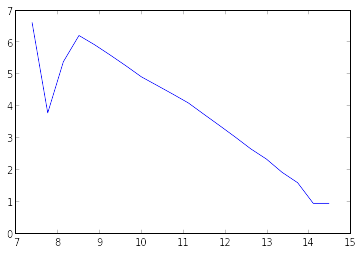

In [8]:
vals, edges = histogram(log10(halo_M_crit200+1E-3)+10, bins=20)
plot(edges[1:], log10(vals))

In [10]:
#Eight bands: U, B, V, K, g, r, i, z. Magnitudes based on the summed-up luminosities of all the stellar particles.
subhalo_mags = subhalos['SubhaloStellarPhotometrics']
print subhalo_mags[0]
#Index into the Group table of the FOF host/parent of this Subhalo. 
subhalo_grnr = subhalos['SubhaloGrNr']

[-24.07362175 -24.44821548 -25.29933167 -28.21474648 -24.89650345
 -25.63689041 -25.99143982 -26.24241829]


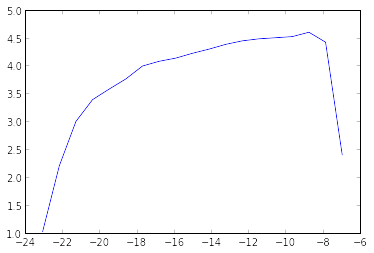

In [35]:
B_mags = subhalo_mags[:,1]
vals, edges = histogram(B_mags, bins=linspace(-24.0,-7.0,20))
plot(edges[1:], log10(vals))

In [118]:
#MW mass range
index_MW = where((halo_M_crit200>50.0) & (halo_M_crit200<500.0))
index_MW = index_MW[0]
n_MW = size(index_MW)
print n_MW

2429


In [119]:
FOF_MW_pos = halos['GroupPos'][index_MW]
FOF_MW_vel = halos['GroupVel'][index_MW]
FOF_MW_FOFID = index_MW

In [120]:
out = open("../data/MW_FOF_candidates.dat", "w")
out.write("#FOFID pos_x pos_y pos_z vel_x vel_y vel_z\n")
out.write("#integer kpc/h kpc/h kpc/h km/s km/s km/s \n")

for i in range(n_MW):
    out.write("%d %f %f %f %f %f %f\n"%(FOF_MW_FOFID[i], FOF_MW_pos[i,0], FOF_MW_pos[i,1], FOF_MW_pos[i,2], 
                      FOF_MW_vel[i,0], FOF_MW_vel[i,1], FOF_MW_vel[i,2]))
out.close()

In [121]:
from sklearn.neighbors import NearestNeighbors


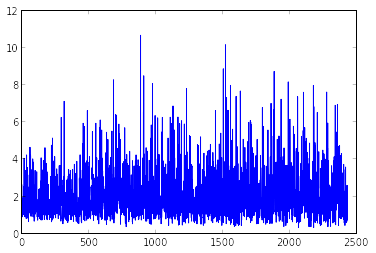

In [122]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(FOF_MW_pos)
distances, indices = nbrs.kneighbors(FOF_MW_pos)
plot(distances[:,1]/1000.0)

In [123]:
#pad boxes around to mock periodic boundary conditions
FOF_MW_pad_pos = FOF_MW_pos.copy()
FOF_MW_pad_ID = arange(n_MW)
l_box = 75000.0
for i in (0,1,-1):
    for j in (0,1,-1):
        for k in (0,1,-1):
            new_pos = FOF_MW_pos.copy()
            if(i):
                new_pos[:,0] = new_pos[:,0] + i*l_box
            if(j):
                new_pos[:,1] = new_pos[:,1] + j*l_box
            if(k):
                new_pos[:,2] = new_pos[:,2] + k*l_box
                
            if((i!=0) | (j!=0) | (k!=0)):
                FOF_MW_pad_pos = append(FOF_MW_pad_pos, new_pos, axis=0)
                FOF_MW_pad_ID = append(FOF_MW_pad_ID, arange(n_MW))

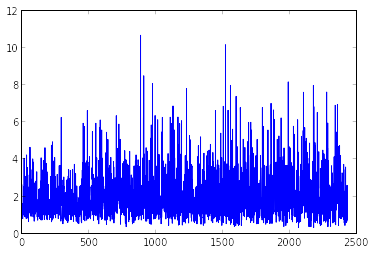

In [124]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(FOF_MW_pad_pos)
distances, indices = nbrs.kneighbors(FOF_MW_pad_pos[0:n_MW,:])
plot(distances[:,1]/1000.0)

In [126]:
print size(where(indices[:,1]>n_MW))
print FOF_MW_pad_ID[indices[:,1]]
print indices[:,1]

91
[ 677  697 1718 ..., 1675 2420 2225]
[ 677  697 1718 ..., 1675 2420 2225]
